In [1]:
#import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("numpy :" , np.__version__)
print("pandas :" , pd.__version__)
print("seaborn :" , sns.__version__)


numpy : 1.21.5
pandas : 1.4.2
seaborn : 0.11.2


In [2]:
#Load my dataset:

df = pd.read_csv('C:\\Users\\eslam\\Desktop\\project\\insurance.csv')

In [3]:
#Explore the dataset
# Display the first 5 rows of the dataset

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Display the summary statistics of numerical columns

df.describe()


,age,bmi,children,charges
count,1218.000000,1218.000000,1218.000000,1218.000000
mean,39.193760,30.706769,1.087849,13201.635843
std,14.032135,6.113779,1.211965,12035.699778
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4724.369462
50%,39.000000,30.447500,1.000000,9382.033000
75%,51.000000,34.792500,2.000000,16454.504562
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Check for missing values


df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Display the data types of columns

df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# display the number of unique values in each column


df.nunique()

age           47
sex            2
bmi          526
children       6
smoker         2
region         4
charges     1218
dtype: int64

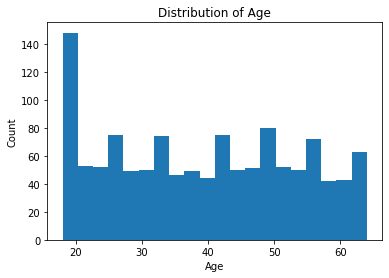

In [8]:
#Visualize the dataset

#Visualize the column "age" with Histogram

plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

C:\Users\eslam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


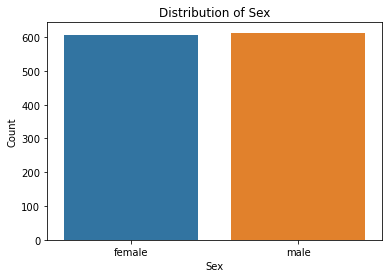

In [9]:
#Visualize the column "sex" with Bar plot


sns.countplot(df['sex'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

C:\Users\eslam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


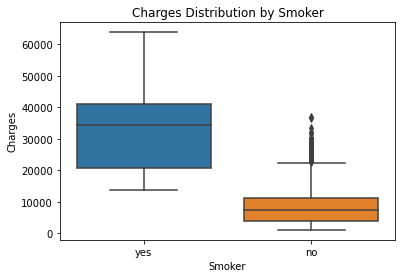

In [10]:
#Visualize the column "smoker" and "charges" with box plot

sns.boxplot(df['smoker'], df['charges'])
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')
plt.show()

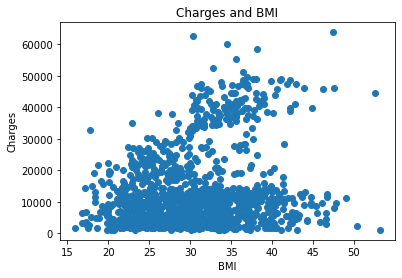

In [11]:
#Visualize the column "bmi" and "charges" with  scatter

plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charges and BMI')
plt.show()

In [12]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from numerical columns
data_cleaned = df.copy()
data_cleaned = remove_outliers(data_cleaned, 'age')
data_cleaned = remove_outliers(data_cleaned, 'bmi')
data_cleaned = remove_outliers(data_cleaned, 'charges')

In [13]:
# Identify categorical columns


categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [14]:
# Perform one-hot encoding for categorical columns


from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=['sex'], prefix = ['sex'] , drop_first=True)
df = pd.get_dummies(df, columns=['smoker'], prefix = ['smoker'] , drop_first=True)
df = pd.get_dummies(df, columns=['region'], prefix = ['region'] , drop_first=True)

print(df.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


In [15]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [16]:
# Perform attribute standardization


from sklearn.preprocessing import StandardScaler
numerical_columns = ['age', 'bmi', 'children', 'charges']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.439699,-0.459278,-0.897960,0.306156,0,1,0,0,1
1,-1.510994,0.501243,-0.072515,-0.953895,1,0,0,1,0
2,-0.798051,0.375246,1.578377,-0.727483,1,0,0,1,0
3,-0.441580,-1.309347,-0.897960,0.730032,1,0,1,0,0
4,-0.512874,-0.298918,-0.897960,-0.775910,1,0,1,0,0


In [17]:
# Identify the features and target variable

X = df.drop('charges', axis=1) 
y = df['charges']
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#the model and GridsearchCV
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
params = {'fit_intercept': [True, False],
    'normalize': [True, False]}



In [18]:
from sklearn.model_selection import GridSearchCV
lgCV = GridSearchCV(lg, param_grid=params ,cv=5, return_train_score=True)

In [19]:
lgCV.fit(X_train,y_train)

C:\Users\eslam\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\eslam\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             return_train_score=True)

In [20]:
lgCV.cv_results_

{'mean_fit_time': array([0.00546508, 0.00195227, 0.00214748, 0.00214748]),
 'std_fit_time': array([7.02712537e-03, 3.87384339e-07, 3.91101924e-04, 3.90506151e-04]),
 'mean_score_time': array([0.00117135, 0.00156136, 0.00175691, 0.00117111]),
 'std_score_time': array([0.00039017, 0.00047777, 0.00039065, 0.00038993]),
 'param_fit_intercept': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_normalize': masked_array(data=[True, False, True, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True, 'normalize': True},
  {'fit_intercept': True, 'normalize': False},
  {'fit_intercept': False, 'normalize': True},
  {'fit_intercept': False, 'normalize': False}],
 'split0_test_score': array([0.79911542, 0.79911542, 0.78014911, 0.78014911]),
 'split1_test_score': array([0.74860014, 0.74860014, 0.7224316 , 0

In [21]:
lgBest = lgCV.best_estimator_


In [22]:
lgBest.fit(X_train,y_train)

C:\Users\eslam\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [23]:
lgBest.predict(X_test)

array([-0.26186647,  0.02563894, -0.44977672, -0.49078883, -0.27906711,
       -0.83743188, -0.02530714, -0.72727313,  2.24640517, -0.13331206,
        0.14184204,  0.12825241, -0.35434186, -0.66909497,  0.07446495,
        0.14771533, -0.87220159, -0.57294126, -0.72550952,  0.15331758,
       -0.18313905, -0.18713049, -0.7923225 ,  2.23693436,  0.27567264,
       -0.3324027 , -0.71197937, -0.1171961 , -0.17115997,  0.08334963,
       -0.13462269, -0.65530999, -0.7608548 , -0.49882767, -0.06686131,
       -0.48434812, -0.4905592 , -0.22481303, -0.69183751,  1.92897714,
       -0.20230579, -0.06168982, -0.59189525, -0.69523552, -0.11094676,
       -0.80223524, -0.4466517 , -0.82959549, -0.3163795 , -0.19201779,
       -0.40156486, -0.06113291,  1.80886998,  1.4816337 , -0.99889534,
       -0.4468925 ,  1.30643044, -0.70049418, -0.78745143, -0.04754627,
       -0.42609624, -0.60181418,  1.55644687,  1.63888798, -0.73287435,
       -0.97476596,  1.25737231,  0.38669192, -0.43544788,  1.92

In [24]:
lgBest.score(X_test,y_test)

0.7429622776920746

In [36]:
lgBest.score(X_train,y_train)


0.7486075301109403

In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,lgBest.predict(X_test) )
print('R2 Score:', r2)


R2 Score: 0.7429622776920746


In [26]:
#Load my hidden test set and do the same data analysis :


df2 = pd.read_csv('C:\\Users\\eslam\\Desktop\\project\\insurance_test_hidden.csv')

In [27]:
df2.head()

,age,sex,bmi,children,smoker,region
0,18,female,38.280,0,no,southeast
1,22,male,19.950,3,no,northeast
2,44,female,26.410,0,no,northwest
3,44,male,30.690,2,no,southeast
4,36,male,41.895,3,yes,northeast


In [28]:
df2.nunique()

age          42
sex           2
bmi         104
children      5
smoker        2
region        4
dtype: int64

In [29]:
df2.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [30]:
# Identify categorical columns


categorical_columns = df2.select_dtypes(include=['object']).columns
categorical_columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [31]:
# Perform one-hot encoding for categorical columns


from sklearn.preprocessing import OneHotEncoder
df2 = pd.get_dummies(df2, columns=['sex'], prefix = ['sex'] , drop_first=True)
df2 = pd.get_dummies(df2, columns=['smoker'], prefix = ['smoker'] , drop_first=True)
df2 = pd.get_dummies(df2, columns=['region'], prefix = ['region'] , drop_first=True)

print(df2.head())

   age     bmi  children  sex_male  smoker_yes  region_northwest  \
0   18  38.280         0         0           0                 0   
1   22  19.950         3         1           0                 0   
2   44  26.410         0         0           0                 1   
3   44  30.690         2         1           0                 0   
4   36  41.895         3         1           1                 0   

   region_southeast  region_southwest  
0                 1                 0  
1                 0                 0  
2                 0                 0  
3                 1                 0  
4                 0                 0  


In [32]:
# Perform attribute standardization


from sklearn.preprocessing import StandardScaler
numerical_columns = ['age', 'bmi', 'children']
scaler = StandardScaler()
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

df2.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.499894,1.360999,-1.027635,0,0,0,1,0
1,-1.218774,-1.735393,1.614856,1,0,0,0,0
2,0.327388,-0.644138,-1.027635,0,0,1,0,0
3,0.327388,0.078860,0.734025,1,0,0,1,0
4,-0.234853,1.971662,1.614856,1,1,0,0,0


In [33]:
#doing the prediction to the hidden test set

lgBest.predict(df2)

array([-0.71158421, -0.90360353, -0.47080338, -0.318139  ,  1.96639756,
       -0.68947726, -0.50505082, -0.33526953, -0.52687442, -0.03718654,
       -0.65133959, -0.93759653, -0.17372791, -0.83810579, -0.88501184,
       -0.40541413, -0.33715571, -0.5610706 ,  0.37952005, -0.82361389,
       -0.22018649, -0.20942424,  1.38113765, -0.57440834, -0.60407462,
       -0.22265838,  1.50433494,  0.0582766 , -0.03198493, -0.76200904,
       -0.26308211, -0.74911315, -0.66070225, -0.2437199 , -0.15236969,
       -0.28112758, -0.97041461, -0.73542184, -1.00988133, -0.43673968,
       -0.01575164, -0.48578963,  1.19171814,  1.34975065,  0.0423016 ,
       -0.53179677,  0.20927579, -0.26076679, -0.28341748, -0.1923376 ,
       -0.02594223, -1.2343656 , -0.11681806, -0.55335837,  1.35194446,
       -1.03440734, -0.36922901,  1.04235077, -0.15809167,  1.5270224 ,
       -0.69017257, -0.19940936, -0.19613412,  2.00494058, -0.18396723,
        0.14263815, -0.67522702, -1.12068973, -0.5998482 ,  0.86

In [34]:
prediction = pd.DataFrame(lgBest.predict(df2))


In [35]:
#perform the prediction to a csv file

prediction.to_csv('C:\\Users\\eslam\\Desktop\\project\\prediction_eslam_samir.csv' , index = False)
